# Travaux Dirigés n°2

## Configuration du notebook

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Exercice 1

In [2]:
def logistique(t):
    return 1 / (1 + np.exp(-t))

In [3]:
t = np.linspace(-10, 10, 100)
s = logistique(t)

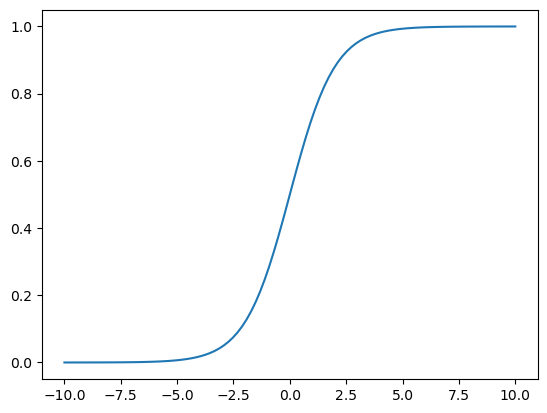

In [4]:
plt.plot(t, s);

## Exercice 2

In [5]:
def phi(X):
    ones = np.ones(X.shape[0]).reshape(-1, 1)
    return np.hstack((ones, X))

In [6]:
beta = np.array([0., 1.]).reshape(-1, 1)
X = np.linspace(-10, 10, 100).reshape(-1, 1)

In [7]:
X_tilde = phi(X)

In [8]:
p = logistique(X_tilde @ beta)

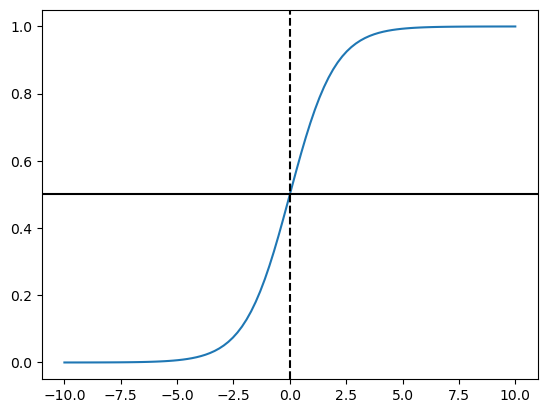

In [9]:
plt.plot(X, p)
plt.axhline(0.5, color="k")
plt.axvline(0., color="k", ls="--");

In [10]:
beta = np.array([1., -1.]).reshape(-1, 1)
p = logistique(X_tilde @ beta)

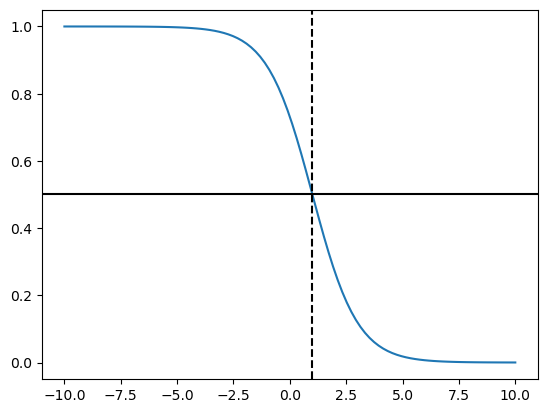

In [11]:
plt.plot(X, p)
plt.axhline(0.5, color="k")
plt.axvline(1., color="k", ls="--");

In [12]:
beta = np.array([0, 10.]).reshape(-1, 1)
p = logistique(X_tilde @ beta)

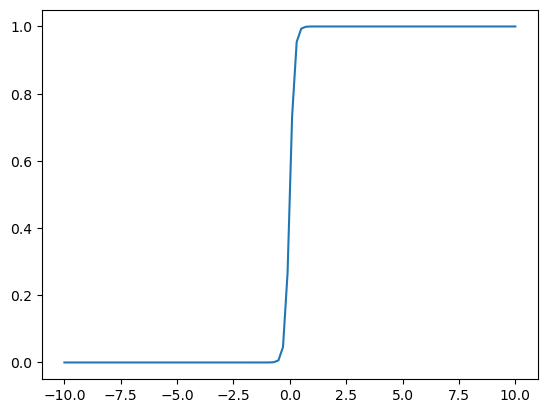

In [13]:
plt.plot(X, p);

In [14]:
beta = np.array([0., -10.]).reshape(-1, 1)
p = logistique(X_tilde @ beta)

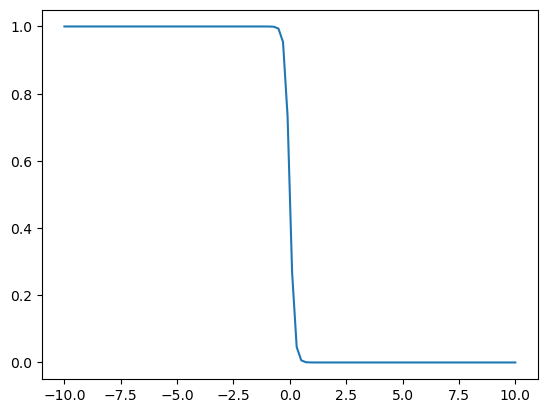

In [15]:
plt.plot(X, p);

## Exercice 3

In [16]:
X = np.array([112., 85., 135., 92.]).reshape(-1, 1)
Y = np.array([1., 0., 1., 0.]).reshape(-1, 1)

In [17]:
X_tilde = phi(X)

In [18]:
beta = np.array([-90., 1.]).reshape(-1, 1)

In [19]:
def gradient(X_tilde, Y, beta):
    n = X_tilde.shape[0]
    return - 1 / n * X_tilde.T @ (Y - logistique(X_tilde @ beta))

In [20]:
gradient(X_tilde, Y, beta)

array([[ 0.22187248],
       [20.40055587]])

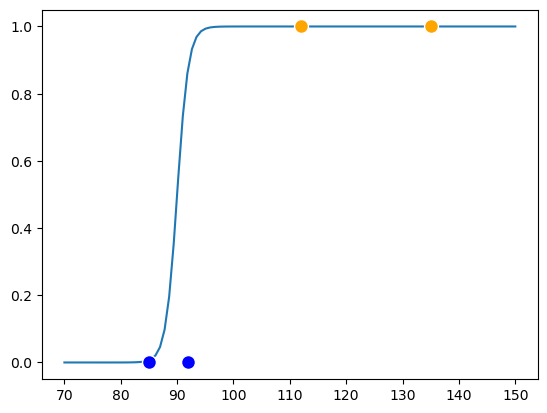

In [21]:
Xi = np.linspace(70, 150, 100).reshape(-1, 1)
Xi_tilde = phi(Xi)
Yi_hat = logistique(Xi_tilde @ beta)
plt.plot(Xi, Yi_hat);
plt.scatter(X[X>=102], Y[X>=102], color="orange", zorder=10, edgecolor="w", s=100)
plt.scatter(X[X<102], Y[X<102], color="blue", zorder=10, edgecolor="w", s=100);

In [22]:
beta = np.array([-102., 1.]).reshape(-1, 1)

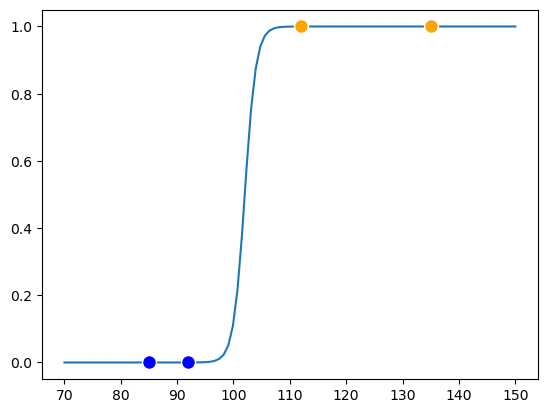

In [23]:
Xi = np.linspace(70, 150, 100).reshape(-1, 1)
Xi_tilde = phi(Xi)
Yi_hat = logistique(Xi_tilde @ beta)
plt.plot(Xi, Yi_hat);
plt.scatter(X[X>=102], Y[X>=102], color="orange", zorder=10, edgecolor="w", s=100)
plt.scatter(X[X<102], Y[X<102], color="blue", zorder=10, edgecolor="w", s=100);

In [24]:
def gradient_vect(X_tilde, Y):
    n = X_tilde.shape[0]
    def inner(beta):
        return - 1 / n * X_tilde.T @ (Y - logistique(X_tilde @ beta))
    return inner

In [180]:
size = 1000
beta_0, beta_1 = np.meshgrid(np.linspace(-80, -110, size), np.linspace(0.6, 1.6, size))

In [181]:
beta = np.stack((beta_0.ravel(), beta_1.ravel())).T
beta = beta[:,:,None]

In [182]:
f = gradient_vect(X_tilde, Y)

In [183]:
nabla = f(beta)
nabla.shape

(1000000, 2, 1)

In [184]:
nabla_n = np.sqrt(np.sum(nabla**2, axis=1)).squeeze().reshape((size, size))

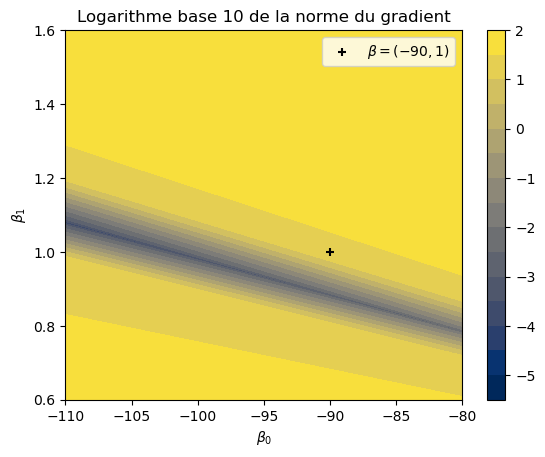

In [185]:
cf = plt.contourf(beta_0, beta_1, np.log10(nabla_n), levels=16, cmap="cividis")
# plt.xlabel("")
plt.scatter([-90.], [1.0], marker="+", label=r"$\beta = (-90, 1)$", color="k");
plt.xlabel(r"$\beta_0$")
plt.ylabel(r"$\beta_1$")
plt.title(r"Logarithme base 10 de la norme du gradient")
plt.legend();
plt.colorbar(cf);